<a href="https://colab.research.google.com/github/MohmedZeibreal/Computer-Vision/blob/main/Computer_Vision_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Computer Vision

In [ ]:
pip install tensorflow opencv-python numpy

In [ ]:
# CELL 1 — TRAIN THE MODEL
import os
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

MODEL_NAME = "image_classifier.h5"

def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.MaxPooling2D(),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def train_and_save(epochs=10):
    print("Loading CIFAR-10 dataset...")
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

    x_train = x_train.astype("float32") / 255.0
    x_test  = x_test.astype("float32") / 255.0

    model = build_model()
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    print("Starting training...")
    history = model.fit(x_train, y_train,
                        batch_size=64,
                        epochs=epochs,
                        validation_split=0.1)
    # Evaluate on test set
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"\nTest accuracy: {test_acc*100:.2f}%  —  Test loss: {test_loss:.4f}")

    model.save(MODEL_NAME)
    print(f"Model saved to: {MODEL_NAME}")
    return model, history

# Run training (change epochs if you want)
model, history = train_and_save(epochs=10)


Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Starting training...
Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3688 - loss: 1.7242 - val_accuracy: 0.6104 - val_loss: 1.1065
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6192 - loss: 1.0703 - val_accuracy: 0.6690 - val_loss: 0.9388
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6898 - loss: 0.8740 - val_accuracy: 0.7130 - val_loss: 0.8334
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7400 - loss: 0.7397 - val_accuracy: 0.7318 - val_loss: 0.7885
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7767 - loss: 0.6418 - val_accuracy: 0.7474 - val_loss: 0.7460
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8121 - loss: 0.5393 - val_accuracy: 0.7386 - val_loss: 0.7919
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8416 - loss: 0.4553 - val_accuracy: 0.7596 - val_loss: 0.7465
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8673 - loss: 0.3


Test accuracy: 73.35%  —  Test loss: 0.9530
Model saved to: image_classifier.h5


Loading model from image_classifier.h5...
Model loaded. Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 620,364 (2.37 MB)

 Trainable params: 620,362 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)


Upload one or more images (png/jpg). The cell will classify each uploaded image.


Saving bird.jfif to bird.jfif

---
File: bird.jfif


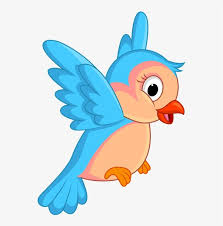

Top predictions:
 - bird : 49.56%
 - airplane : 30.22%
 - dog : 10.67%


In [ ]:
# CELL 2 — UPLOAD & CLASSIFY
import os
import numpy as np
import tensorflow as tf
from PIL import Image
from google.colab import files
from IPython.display import display
import io

MODEL_NAME = "image_classifier.h5"

# CIFAR-10 labels
LABELS = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "bike"
]

# Load model (with helpful checks)
if not os.path.exists(MODEL_NAME):
    raise FileNotFoundError(f"Model file '{MODEL_NAME}' not found. Run Cell 1 first to train/save the model.")

print(f"Loading model from {MODEL_NAME}...")
model = tf.keras.models.load_model(MODEL_NAME)
print("Model loaded. Summary:")
model.summary()

def preprocess_pil_image(pil_img):
    """Take a PIL.Image, convert to RGB, resize to (32,32), normalize and return batch array."""
    if pil_img.mode != "RGB":
        pil_img = pil_img.convert("RGB")
    pil_img = pil_img.resize((32,32), Image.BILINEAR)
    arr = np.asarray(pil_img).astype("float32") / 255.0
    arr = np.expand_dims(arr, axis=0)  # batch dim
    return arr

def get_top_k(preds, k=3):
    preds = preds.flatten()
    idxs = preds.argsort()[-k:][::-1]
    return [(i, preds[i]) for i in idxs]

print("\nUpload one or more images (png/jpg). The cell will classify each uploaded image.")
uploaded = files.upload()

if len(uploaded) == 0:
    print("No files uploaded.")
else:
    for fname, filebytes in uploaded.items():
        print("\n---")
        print("File:", fname)
        try:
            pil_img = Image.open(io.BytesIO(filebytes))
        except Exception as e:
            print("Error opening image:", e)
            continue

        display(pil_img)  # show uploaded image

        try:
            x = preprocess_pil_image(pil_img)
        except Exception as e:
            print("Error during preprocessing:", e)
            continue

        # predict
        preds = model.predict(x, verbose=0)
        top3 = get_top_k(preds, k=3)

        print("Top predictions:")
        for cls_idx, conf in top3:
            print(f" - {LABELS[cls_idx]} : {conf*100:.2f}%")

        # Extra help: if topconfidence is low, tell user model may be unsure
        top_conf = top3[0][1]
        if top_conf < 0.35:
            print("⚠️ Model confidence is low for this image (<35%). The image may not match CIFAR-10 distribution.")
